In [13]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [14]:

data = load_breast_cancer()
X = data.data[:, :2]  
y = data.target.reshape(-1, 1)

In [15]:

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:

class SingleNeuron:
    def __init__(self, n_features):
        self.weights = np.random.randn(n_features, 1) * 0.1
        self.bias = np.zeros(1)
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def forward(self, x):
        z = np.dot(x, self.weights) + self.bias
        return self.sigmoid(z)
    
    def binary_crossentropy(self, y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def train(self, X, y, epochs=100, lr=0.1):
        losses = []
        for epoch in range(epochs):

            y_pred = self.forward(X)
            loss = self.binary_crossentropy(y, y_pred)
            losses.append(loss)
            
            error = y_pred - y
            grad_weights = np.dot(X.T, error) / len(X)
            grad_bias = np.mean(error)
            
            self.weights -= lr * grad_weights
            self.bias -= lr * grad_bias
            
        return losses

neuron = SingleNeuron(n_features=2)
losses = neuron.train(X_train, y_train, epochs=100)

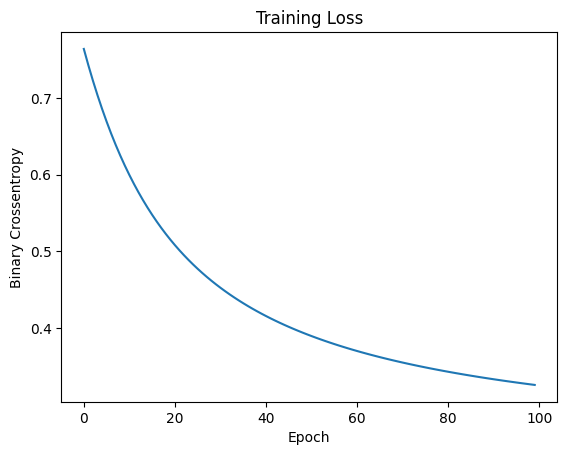

In [17]:

plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.show()

In [18]:

test_pred = (neuron.forward(X_test) > 0.5).astype(int)
accuracy = np.mean(test_pred == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9123


In [19]:

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = neuron.forward(np.c_[xx.ravel(), yy.ravel()]) > 0.5
Z = Z.reshape(xx.shape)

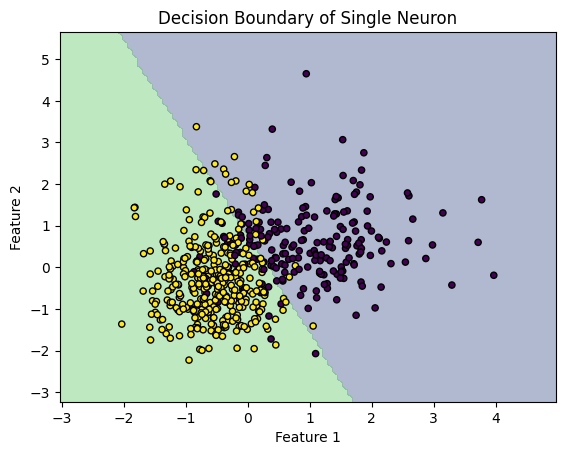

In [20]:

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.title('Decision Boundary of Single Neuron')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [21]:

print("\nDiscussion:")
print("A single neuron (logistic regression) has limitations compared to a full network:")
print("1. It can only learn linear decision boundaries (as seen in the plot)")
print("2. It has limited capacity to learn complex patterns in the data")
print("3. It cannot learn hierarchical features like deep networks can")
print("However, it's computationally efficient and works well for simple problems.")


Discussion:
A single neuron (logistic regression) has limitations compared to a full network:
1. It can only learn linear decision boundaries (as seen in the plot)
2. It has limited capacity to learn complex patterns in the data
3. It cannot learn hierarchical features like deep networks can
However, it's computationally efficient and works well for simple problems.
